In [1]:
#首先我们导入算法框架工具包
import tensorflow.keras as k
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
'''
使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，
或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。inline表示将图表嵌入到Notebook中。
'''

'\n使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，\n或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。inline表示将图表嵌入到Notebook中。\n'

In [2]:
#导入数据集
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#定义查看数据大小函数
def check_dimension(data, data_name):
    assert type(data) is np.ndarray
    print(data_name + "shape is " + str(data.shape))
    
check_dimension(x_train, "x_train")
check_dimension(x_test, "x_test")
check_dimension(y_train, "y_train")
check_dimension(y_test, "y_test")

x_trainshape is (60000, 28, 28)
x_testshape is (10000, 28, 28)
y_trainshape is (60000,)
y_testshape is (10000,)


Num 49089 is an image for 2.
Num 1572 is an image for 8.


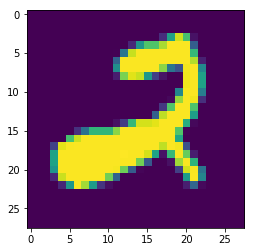

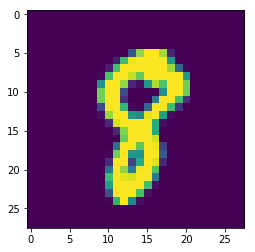

In [4]:
#打印几个样例
def check_example(x, y, number=None):
    if number == None:
        number = np.random.randint(x.shape[0])
        print("Num {} is an image for {}.".format(number, y[number]))
        plt.figure()
        plt.imshow(x[number])
        
check_example(x_train, y_train)
check_example(x_test, y_test)

In [5]:
#对标签进行独热编码
from tensorflow.keras.backend import one_hot
y_train = k.backend.eval(one_hot(y_train, 10))
y_test = k.backend.eval(one_hot(y_test, 10))

In [6]:
check_dimension(x_train, "x_train")
check_dimension(y_train, "y_train")
check_dimension(x_test, "x_test")
check_dimension(y_test, "y_test")

x_trainshape is (60000, 28, 28)
y_trainshape is (60000, 10)
x_testshape is (10000, 28, 28)
y_testshape is (10000, 10)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Input, Flatten, Conv2D, MaxPooling2D

导入Lenet模型图，作为创建网络的参考

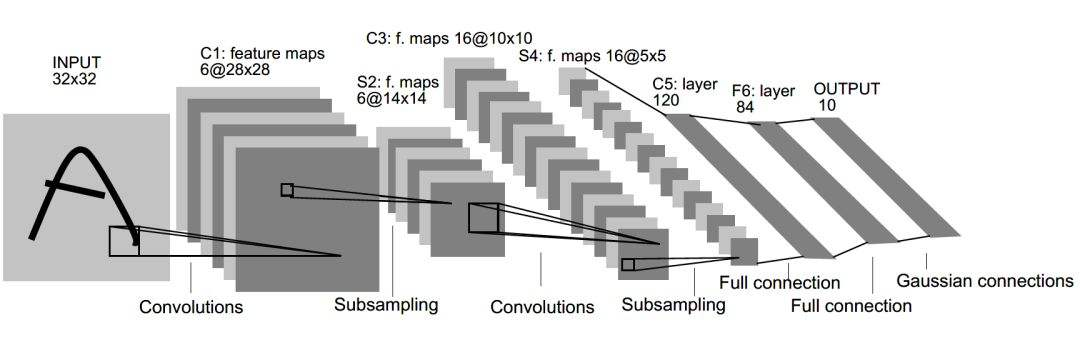

In [8]:
#定义网络结构
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), padding="same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, kernel_size=(5,5), padding="valid", activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164     
__________

编译模型（设置优化器，优化参数）

In [10]:
#训练模型
adam = k.optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#设置mini_bath
def gen_mini_batch():
    pass

In [12]:
x_train = k.backend.eval(k.backend.expand_dims(x_train, axis=-1))
x_test = k.backend.eval(k.backend.expand_dims(x_test, axis=-1))

In [15]:
history_lenet_0 = model.fit(x_train, y_train, batch_size = 64, epochs = 20, shuffle = True)

Epoch 1/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0364 - acc: 0.9887
Epoch 2/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0308 - acc: 0.9905
Epoch 3/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0251 - acc: 0.9922
Epoch 4/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0213 - acc: 0.9930
Epoch 5/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0174 - acc: 0.9947
Epoch 6/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0144 - acc: 0.9958
Epoch 7/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0124 - acc: 0.9959
Epoch 8/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0110 - acc: 0.9966
Epoch 9/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0094 - acc: 0.9973
Epoch 10/20
60000/60000 [==============================] - 5s 76us/sample - loss: 

In [16]:
#测试模型
#使用模型在测试集上进行预测，生成结果为numpy.ndarray, shape=(10000, 10)
y_test_predict = model.predict(x_test)
#使用np.argmax可以求得预测样本标签，e.g. 1,2,3,...9
y_label_pre = np.argmax(y_test_predict, axis=-1)
#求测试准确率
test_acc = np.sum((y_label_pre==np.argmax(y_test, axis=-1)).astype(int))/y_label_pre.shape[0]
test_acc

0.9823